In [1749]:
import random
import numpy as np

np.set_printoptions(precision=2, suppress=True)


def xavier_initilization(size_l, size_l1):
    return np.random.randn(size_l, size_l1) * np.sqrt(1 / size_l1)


def sigmoid(z):
    return 1. / (1. + np.exp(-z))


def dsigmoid(z):
    s = sigmoid(z)
    return s * (1. - s)


def relu(z):
    return np.maximum(0, z)


def drelu(z):
    return np.where(z > 0, 1, 0)


activations = { "relu": relu, "sigmoid": sigmoid }
activation_derivs = {"relu": drelu, "sigmoid": dsigmoid }

class Network:
    def __init__(self, layers):
        self.dim = [size for size, _ in layers]
        self.act = [activation for _, activation in layers]
        self.l = len(layers)
        # the input layer doesn't have parameters
        self.w = [xavier_initilization(self.dim[i], self.dim[i-1])
                  for i in range(1, self.l)]
        self.b = [np.zeros((self.dim[i], 1)) 
                  for i in range(1, self.l)]
        
    def __forward(self, x):
        a = x
        a_list = [x]
        z_list = []
        
        for i in range(self.l - 1):
            z = np.dot(self.w[i], a) + self.b[i]
            z_list.append(z)
            a = activations[self.act[i + 1]](z)
            a_list.append(a)
            
        return a_list, z_list

    def __backward(self, a, z, y):
        m = y.shape[0]
        
        d = (a[-1] - y) * activation_derivs[self.act[-1]](z[-1]) # output error
        dw = [np.dot(d, a[-2].T) / m]
        db = [np.mean(d, axis=1, keepdims=True)]

        for l in range(2, self.l):
            d = np.dot(self.w[-l + 1].T, d) * activation_derivs[self.act[-l]](z[-l])
            dw.insert(0, np.dot(d, a[-l - 1].T) / m)
            db.insert(0, np.mean(d, axis=1, keepdims=True))
            
        return dw, db 

    def __update(self, X_batch, y_batch, lr):
        a, z = self.__forward(X_batch)
        dw, db = self.__backward(a, z, y_batch)
        
        for i in range(self.l - 1):
            self.w[i] -= lr * dw[i]
            self.b[i] -= lr * db[i]
        
    def fit(self, X, y, n_epochs, lr=1, mini_batch_size=32, test_data=None, verbose=False):
        n = len(X)
        indices = np.arange(n)
        
        for epoch in range(n_epochs):
            if verbose: self.print_params()
            np.random.shuffle(indices)
            mini_batch_indices = [indices[k:k+mini_batch_size] 
                                  for k in range(0, n, mini_batch_size)]
            
            for mini_batch_idx in mini_batch_indices:
                X_batch = np.atleast_2d(X[mini_batch_idx]).T
                y_batch = np.atleast_2d(y[mini_batch_idx]).T
                self.__update(X_batch, y_batch, lr)
            
            if test_data:
                print(f"Epoch {epoch}: Accuracy = {self.__evaluate(test_data)}")
            
    def predict(self, X):
        X = np.atleast_2d(X).T
        a, _ = self.__forward(X)
        return a[-1] 
    
    def __evaluate(self, test_data):
        test_results = [(np.argmax(self.predict(X)), y)
                       for (X, y) in test_data]
        return sum(int(y_pred == y) for (y_pred, y) in test_results) / len(test_results)
    
    def print_params(self):
        print("----------------------------")
        print("Network Parameters:")
        print("----------------------------")

        for i, (w, b) in enumerate(zip(self.w, self.b)):
            print(f"Layer {i+1}:")
            print("Weights:")
            print(w)
            print(f"Shape: {w.shape}")
            print("Biases:")
            print(b.reshape(-1, 1))  # Reshape biases to be a column vector
            print(f"Shape: {b.shape}")
            print("-" * 30)

        print("----------------------------\n")


In [1750]:
import keras
from keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
train_inputs = x_train.reshape(60000, 28*28)
train_results = to_categorical(y_train, 10)
test_inputs = x_test.reshape(10000, 28*28)
test_data = list(zip(test_inputs, y_test))

In [1751]:
net = Network([(784, ""), (28, "sigmoid"), (28, "relu"), (10, "sigmoid")])
net.fit(train_inputs, train_results, 50, 0.01, 32, test_data)

/var/folders/0p/_krd7pz16cx09cvjhgjzrjl00000gn/T/ipykernel_21284/838514860.py:12: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp(-z))


Epoch 0: Accuracy = 0.777
Epoch 1: Accuracy = 0.8336
Epoch 2: Accuracy = 0.8392
Epoch 3: Accuracy = 0.8579
Epoch 4: Accuracy = 0.8704
Epoch 5: Accuracy = 0.878
Epoch 6: Accuracy = 0.8818
Epoch 7: Accuracy = 0.8784
Epoch 8: Accuracy = 0.8736
Epoch 9: Accuracy = 0.8949
Epoch 10: Accuracy = 0.8891
Epoch 11: Accuracy = 0.8944
Epoch 12: Accuracy = 0.8955
Epoch 13: Accuracy = 0.8839
Epoch 14: Accuracy = 0.8993
Epoch 15: Accuracy = 0.9008
Epoch 16: Accuracy = 0.8991
Epoch 17: Accuracy = 0.8993
Epoch 18: Accuracy = 0.9004
Epoch 19: Accuracy = 0.9065
Epoch 20: Accuracy = 0.9064
Epoch 21: Accuracy = 0.9063
Epoch 22: Accuracy = 0.9046
Epoch 23: Accuracy = 0.9083
Epoch 24: Accuracy = 0.8987
Epoch 25: Accuracy = 0.9067
Epoch 26: Accuracy = 0.9077
Epoch 27: Accuracy = 0.9166
Epoch 28: Accuracy = 0.912
Epoch 29: Accuracy = 0.9084
Epoch 30: Accuracy = 0.9121
Epoch 31: Accuracy = 0.9181
Epoch 32: Accuracy = 0.9109
Epoch 33: Accuracy = 0.9095
Epoch 34: Accuracy = 0.9136
Epoch 35: Accuracy = 0.9113
Epoch

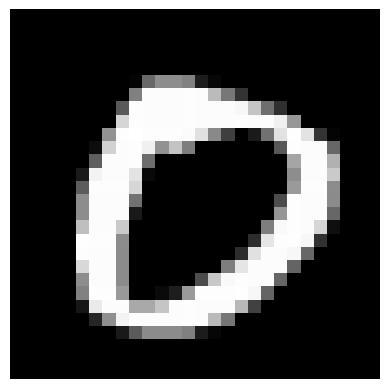

y_true: 0
y_pred: 0


/var/folders/0p/_krd7pz16cx09cvjhgjzrjl00000gn/T/ipykernel_21284/838514860.py:12: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp(-z))


In [1763]:
rnd_idx = random.randint(0, len(x_test))
plt.imshow(x_test[rnd_idx], cmap='grey')
plt.axis('off')
plt.show()
print(f"y_true: {y_test[rnd_idx]}")
print(f"y_pred: {np.argmax(net.predict((x_test[rnd_idx].reshape(1, 28*28))))}")